<a href="https://colab.research.google.com/github/Mahonry/RedesNeuronales/blob/master/Redes_Neuronales_Reconocimiento_de_im%C3%A1genes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales
__________________________________________

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils, models, datasets, transforms

from PIL import Image
import urllib.request as request

import matplotlib.pyplot as plt

## Modelo Pre-Entrenado (Reconocimiento de imagenes)

In [0]:
inception = models.inception_v3(pretrained = True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


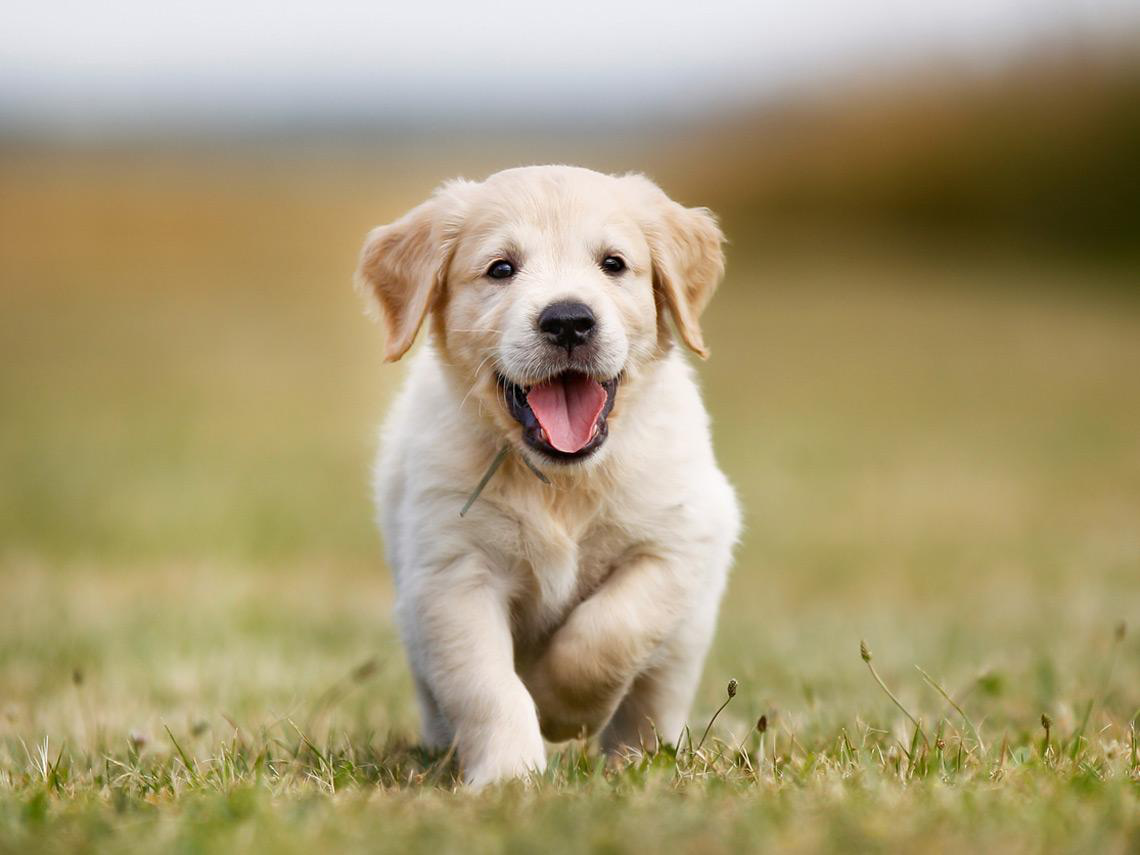

In [0]:
url = "https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/5b755a235cafe886f57f0c61/golden-cachorro_0.jpg"
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
                                 transforms.Resize(128),
                                 transforms.CenterCrop(96),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean = [0.485, 0.456, 0.406],
                                     std = [0.229, 0.224, 0.225]
                                 )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7f24088d3518>,)

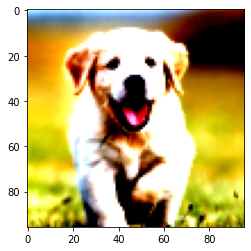

In [0]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t,0) 
plt.imshow(img_t.permute(1, 2, 0)), 

In [0]:
out = inception(batch)

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [0]:
_, index = torch.max(out, 1)

In [0]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('redbone', 33.805179595947266)

In [0]:
"""
torch.nn.functional.softmax(out, dim=1) Lo que hace es regresar un tensor el cual normaliza los valores de ‘out’ a valores entre 1 y 0. De manera que el valor más pequeño en ‘out’ estará muy cercano a 0 en el tensor ‘percentage’ y el valor más grande en ‘out’ será cercano a 1 en ‘percentage’.
torch.nn.functional.softmax(out, dim=1)[0] regresa todos los valores y
torch.nn.functional.softmax(out, dim=1)[0]*100 simplemente los multiplica para que aparezcan en forma de porcentage.


labels’ dijimos que es una lista con todas las etiquetas del modelo.
index es un tensor que tiene un solo elemento igual al índice de la etiqueta de mayor parecido al batch y index[0] regresa el valor. Por lo que:
labels[ index[0] ] Regresa el elementos en ‘labels’ cuya posición es index[0] osea el elemento con mayor parecido al batch.
percentage[ index[0] ] Regresa el porcentaje de la coincidencia más alta entre etiqueta y batch y la extensión .item() lo que hace es regresar solo el valor y no un tensor.
"""

In [0]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

redbone 33.805179595947266
English setter 33.58285140991211
pencil sharpener 20.374370574951172
whiptail, whiptail lizard 3.7742390632629395
kuvasz 2.842930793762207


## Trabajando con un Dataset

In [0]:
data_path = "data/"
dataset = datasets.CIFAR10(data_path, train = True, download = True)
validation_dataset = datasets.CIFAR10(data_path, train = False, download = True)

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
classes = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
img, label = dataset[200]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F240550BCF8>, 6, 'frog')

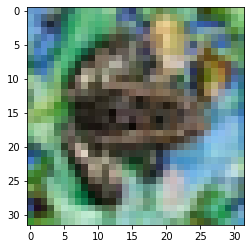

In [0]:
plt.imshow(img)

In [0]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F240550BCF8>,
 tensor([[[0.4118, 0.3882, 0.4353,  ..., 0.4431, 0.5882, 0.6431],
          [0.4431, 0.3333, 0.2745,  ..., 0.2824, 0.4196, 0.5490],
          [0.4157, 0.3529, 0.1843,  ..., 0.2941, 0.4588, 0.4706],
          ...,
          [0.2157, 0.1255, 0.1412,  ..., 0.0471, 0.1725, 0.4039],
          [0.1922, 0.1961, 0.2235,  ..., 0.1647, 0.3373, 0.4588],
          [0.2353, 0.3647, 0.3725,  ..., 0.3804, 0.3608, 0.3294]],
 
         [[0.6078, 0.5882, 0.5843,  ..., 0.6275, 0.7725, 0.8471],
          [0.6627, 0.5176, 0.3961,  ..., 0.5333, 0.6902, 0.8118],
          [0.6471, 0.5176, 0.2784,  ..., 0.5059, 0.7255, 0.7569],
          ...,
          [0.2902, 0.0510, 0.1176,  ..., 0.4039, 0.3608, 0.5725],
          [0.4039, 0.2235, 0.2980,  ..., 0.5529, 0.5882, 0.6745],
          [0.5725, 0.5373, 0.6118,  ..., 0.7059, 0.6471, 0.6275]],
 
         [[0.8000, 0.8078, 0.7647,  ..., 0.3412, 0.5255, 0.5569],
          [0.8235, 0.7176, 0.5137,  ..., 0

In [0]:
# Necesito transformar todo el dataset en tensores
dataset = datasets.CIFAR10(data_path, train = True, download = True, transform = transforms.ToTensor())

Files already downloaded and verified


In [0]:
dataset[50][0].min(), dataset[50][0].max()

(tensor(0.0314), tensor(0.9529))

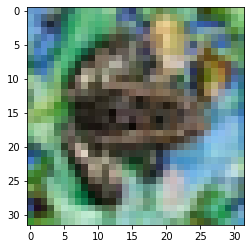

In [0]:
plt.imshow(dataset[200][0].permute(1,2,0))

In [0]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim = 3)

In [0]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [0]:
dataset[0][0][2].shape

torch.Size([32, 32])

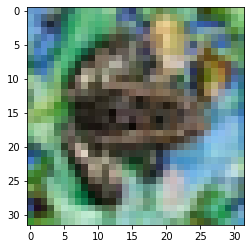

In [0]:
plt.imshow(imgs[:,:,:,200].permute(1,2,0))

In [0]:
mean = imgs.view(3,-1).mean(dim = 1)
std = imgs.view(3,-1).std(dim = 1)

In [0]:
mean,std

(tensor([0.4915, 0.4823, 0.4468]), tensor([0.2470, 0.2435, 0.2616]))

In [0]:
imgs.view(3,-1).shape

torch.Size([3, 51200000])

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915,0.4823,0.4468),(0.2470,0.2435,0.2616))]
)

## Construyendo el modelo

In [0]:
# Llamamos de nuevo el dataset ya con las transformaciones echas
dataset = datasets.CIFAR10(data_path, train = True, download = True, transform = transform)
validation_dataset = datasets.CIFAR10(data_path, train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
size = 4
dataloader = torch.utils.data.DataLoader(dataset, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car
frog
car
deer


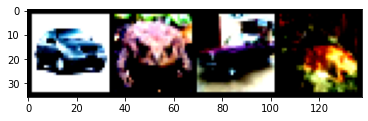

In [0]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()
classes = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.imshow(utils.make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in dataset if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in validation_dataset if label in [1, 3]]

In [0]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512), #El 512 se puede ajustar, es el numero de nodos
    nn.Tanh(), # Esta funcion de activacion se eligio arbitrariamente
    nn.Linear(512,2), # 512 pasos intermedios y 2 la clasificacion binaria 
    nn.Softmax(dim = 1)
)

In [0]:
def softmax(x):
  return torch.exp(x)/ torch.exp(x).sum()

In [0]:
x = torch.tensor([1.0,2.0,3.0]) #Solo como prueba para ver como funciona softmax

In [0]:
softmax(x).sum()

tensor(1.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

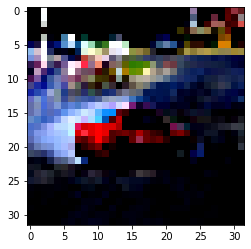

In [0]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [0]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4893, 0.5107]], grad_fn=<SoftmaxBackward>)

In [0]:
_,index = torch.max(out, dim = 1)
_,index

(tensor([0.5107], grad_fn=<MaxBackward0>), tensor([1]))

In [0]:
print('->',class_names[label],' model:',class_names[index])

-> car  model: car


## Implementando un clasificador totalmente conectado
___________________________________________________________

In [0]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512), 
    nn.Tanh(), 
    nn.Linear(512,2), 
    nn.LogSoftmax(dim = 1)
)

loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

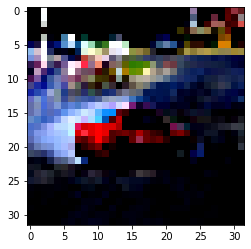

In [0]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]


In [0]:
out = model(img.view(-1).unsqueeze(0))
print(out)

print('->',class_names[label],' model:',class_names[index])

tensor([[-0.5023, -0.9291]], grad_fn=<LogSoftmaxBackward>)
-> car  model: cat


In [0]:
# Comenzamos a entrenar el modelo
i=0
optimizer = optim.SGD(model.parameters(), lr = 0.01)
n_epochs = 3

for epoch in range(n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch,float(loss)))

Epoch: 0, Loss: 0.029834
Epoch: 1, Loss: 0.017027
Epoch: 2, Loss: 0.634041


In [0]:
# Reentrenamos el modelo usando el dataloader
train_loader = torch.utils.data.DataLoader(data_set, batch_size = 64, shuffle=True)


model = nn.Sequential(
    nn.Linear(3*32*32, 512), 
    nn.Tanh(), 
    nn.Linear(512,2), 
    nn.LogSoftmax(dim = 1)
)

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
n_epochs = 100

In [0]:
for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch,float(loss)))

Epoch: 0, Loss: 0.442544
Epoch: 1, Loss: 0.505175
Epoch: 2, Loss: 0.440629
Epoch: 3, Loss: 0.586066
Epoch: 4, Loss: 0.276091
Epoch: 5, Loss: 0.360250
Epoch: 6, Loss: 0.387782
Epoch: 7, Loss: 0.239240
Epoch: 8, Loss: 0.551298
Epoch: 9, Loss: 0.224454
Epoch: 10, Loss: 0.470302
Epoch: 11, Loss: 0.178058
Epoch: 12, Loss: 0.478829
Epoch: 13, Loss: 0.297057
Epoch: 14, Loss: 0.177814
Epoch: 15, Loss: 0.079861
Epoch: 16, Loss: 0.165213
Epoch: 17, Loss: 0.488603
Epoch: 18, Loss: 0.227810
Epoch: 19, Loss: 0.186417
Epoch: 20, Loss: 0.346904
Epoch: 21, Loss: 0.165114
Epoch: 22, Loss: 0.183283
Epoch: 23, Loss: 0.048942
Epoch: 24, Loss: 0.090112
Epoch: 25, Loss: 0.069019
Epoch: 26, Loss: 0.193039
Epoch: 27, Loss: 0.113223
Epoch: 28, Loss: 0.084909
Epoch: 29, Loss: 0.063233
Epoch: 30, Loss: 0.193815
Epoch: 31, Loss: 0.071983
Epoch: 32, Loss: 0.085676
Epoch: 33, Loss: 0.076338
Epoch: 34, Loss: 0.023520
Epoch: 35, Loss: 0.075079
Epoch: 36, Loss: 0.089739
Epoch: 37, Loss: 0.052735
Epoch: 38, Loss: 0.025

In [0]:
# Realizamos la validacion
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.056500


In [0]:
img, label = validation_set[200]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

tensor([[-0.0369, -3.3167]], grad_fn=<LogSoftmaxBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  cat  model: car


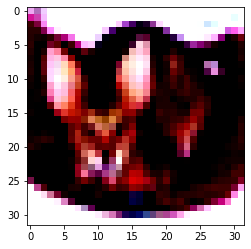

In [0]:
print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [0]:
counter = 0
for i in range(2000):
  img, label = validation_set[i]
  out = model(img.view(-1).unsqueeze(0))
  _, index = torch.max(out, dim=1)
  print('->: ',class_names[label],' model:',class_names[index],"    ",i)

  if class_names[label] == class_names[index]:
    counter += 1

->:  cat  model: cat      0
->:  car  model: cat      1
->:  cat  model: cat      2
->:  car  model: car      3
->:  car  model: car      4
->:  cat  model: cat      5
->:  cat  model: cat      6
->:  cat  model: cat      7
->:  cat  model: cat      8
->:  car  model: car      9
->:  cat  model: cat      10
->:  cat  model: cat      11
->:  cat  model: cat      12
->:  car  model: car      13
->:  car  model: car      14
->:  cat  model: cat      15
->:  cat  model: cat      16
->:  car  model: car      17
->:  car  model: car      18
->:  cat  model: cat      19
->:  car  model: car      20
->:  cat  model: car      21
->:  cat  model: cat      22
->:  car  model: car      23
->:  cat  model: cat      24
->:  car  model: car      25
->:  car  model: car      26
->:  cat  model: cat      27
->:  car  model: car      28
->:  cat  model: car      29
->:  cat  model: cat      30
->:  cat  model: cat      31
->:  car  model: cat      32
->:  car  model: car      33
->:  car  model: car    

In [0]:
counter/2000 # Precision

0.8695

## Mejoras, Limitaciones y conclusiones

In [0]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.330474
Epoch: 1, Loss: 0.303931
Epoch: 2, Loss: 0.419745
Epoch: 3, Loss: 0.295209
Epoch: 4, Loss: 0.159079
Epoch: 5, Loss: 0.278176
Epoch: 6, Loss: 0.199109
Epoch: 7, Loss: 0.190222
Epoch: 8, Loss: 0.181318
Epoch: 9, Loss: 0.424654
Epoch: 10, Loss: 0.260949
Epoch: 11, Loss: 0.280548
Epoch: 12, Loss: 0.240529
Epoch: 13, Loss: 0.369880
Epoch: 14, Loss: 0.371681
Epoch: 15, Loss: 0.072643
Epoch: 16, Loss: 0.118953
Epoch: 17, Loss: 0.252330
Epoch: 18, Loss: 0.873213
Epoch: 19, Loss: 0.075125
Epoch: 20, Loss: 0.203288
Epoch: 21, Loss: 0.177761
Epoch: 22, Loss: 0.187988
Epoch: 23, Loss: 0.388496
Epoch: 24, Loss: 0.519488
Epoch: 25, Loss: 0.248575
Epoch: 26, Loss: 0.335433
Epoch: 27, Loss: 0.080368
Epoch: 28, Loss: 0.065554
Epoch: 29, Loss: 0.041002
Epoch: 30, Loss: 0.009953
Epoch: 31, Loss: 0.005761
Epoch: 32, Loss: 0.012242
Epoch: 33, Loss: 0.022927
Epoch: 34, Loss: 0.025707
Epoch: 35, Loss: 0.157674
Epoch: 36, Loss: 0.026919
Epoch: 37, Loss: 0.023813
Epoch: 38, Loss: 0.003

In [0]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.856000


In [0]:
# Calculamos el desempeño en el dataset de entrenamiento

train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total)) # Tuvimos overfilling 

Accuracy: 1.000000


In [0]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True]) # Muchos parametros, para un dataset muy pequeño

3737474

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


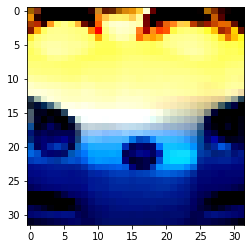

In [0]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))